#### Exercise 1 Wine Dataset

#### Wine dataset
http://archive.ics.uci.edu/ml/datasets/Wine
Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

NOTE: 1st attribute is class identifier (1-3)

#### Important Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml


#sklearn
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer


from sklearn.model_selection import GridSearchCV


#### Loading the Data

In [2]:
cols = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

In [3]:
df_wine.head(5)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Preprocessing data

In [4]:
# Number of samples and number of attributes
num_samples = df_wine.shape[0]
num_attributes = df_wine.shape[1] - 1 # first one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  178
The number of attributes is:  13


In [5]:
#Counting the number of samples for each class
wine = df_wine.to_numpy()
num_class_1 = sum(wine[:, 0] == 1)
num_class_2 = sum(wine[:, 0] == 2)
num_class_3 = sum(wine[:, 0] == 3)

print("Number of samples that belong to class 1: ", str(num_class_1))
print("Number of samples that belong to class 2: ", str(num_class_2))
print("Number of samples that belong to class 3: ", str(num_class_3))

Number of samples that belong to class 1:  59
Number of samples that belong to class 2:  71
Number of samples that belong to class 3:  48


In [6]:
df_wine.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

All the variables contain numeric type attributes

#### Exploratory Data Analysis

In [7]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


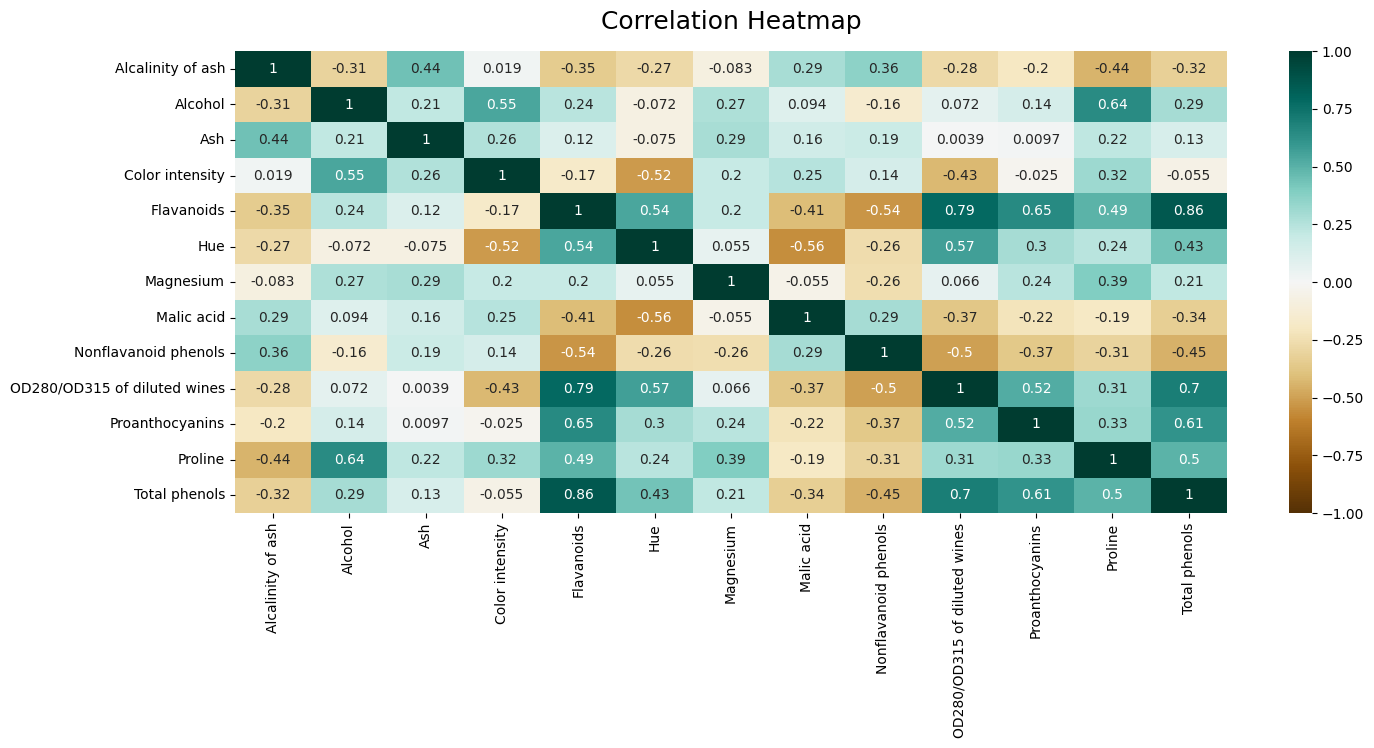

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_wine[df_wine.columns.difference(['class'])].corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

Observations:
- The heatmap above shows that the variables are highly correlated with each-other
- The most noteworthy correlation, with a coefficient of 0.86 exists between `Total Phenols` and
`Flavonoids`
- `Flavanoids & OD280/OD315 of diluted wines`-> 0.79
- `Alcohol` and `Proline`-> 0.64
- `Flavanoids` and  `Nonflavanoid phenols`-> -0.54 ,etc.

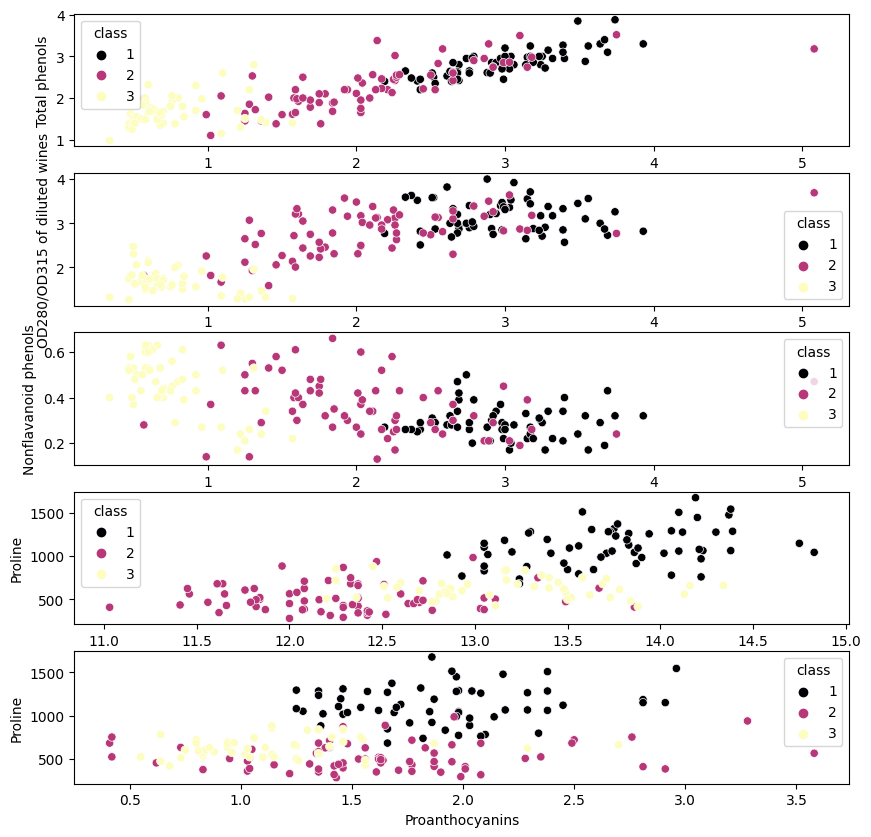

In [9]:
fig, axes = plt.subplots(5, figsize = (10, 10)) 
axes = axes.flatten()
sns.scatterplot(ax = axes[0],
                x = "Flavanoids",
                y = "Total phenols",
                hue = "class",
                palette = "magma",
                data = df_wine)

sns.scatterplot(ax = axes[1],
                x = "Flavanoids",
                y = "OD280/OD315 of diluted wines",
                hue = "class",
                palette = "magma",
                data = df_wine)

sns.scatterplot(ax = axes[2],
                x = "Flavanoids",
                y = "Nonflavanoid phenols",
                hue = "class",
                palette = "magma",
                data = df_wine)


sns.scatterplot(ax = axes[3],
                x = "Alcohol",
                y = "Proline",
                hue = "class",
                palette = "magma",
                data = df_wine)



sns.scatterplot(ax = axes[4],
                x = "Proanthocyanins",
                y = "Proline",
                hue = "class",
                palette = "magma",
                data = df_wine)
plt.show()


Observations:

- As can be seen above, usually  there is clear separation between our classes. Especially `class 3` can be clearly distinguished from the rest of the classes in most cases. Howevers, some overlaps surely occur.

In [63]:
def creating_box_hist(column, df):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_dis) = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.20, .80)},figsize=(8, 5))  
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode().tolist()[0]

    f.suptitle("Data distribution of "+ column  , fontsize=10, fontweight='bold')
    # assigning a graph to each ax
    sns.color_palette("pastel")
    sns.boxplot(df[column], ax=ax_box,orient = 'h',showmeans = True,color='lightgreen')
    sns.despine(top=True,right=True,left=True)
    sns.histplot(df[column],kde=False,ax=ax_dis,color = 'lightblue')
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

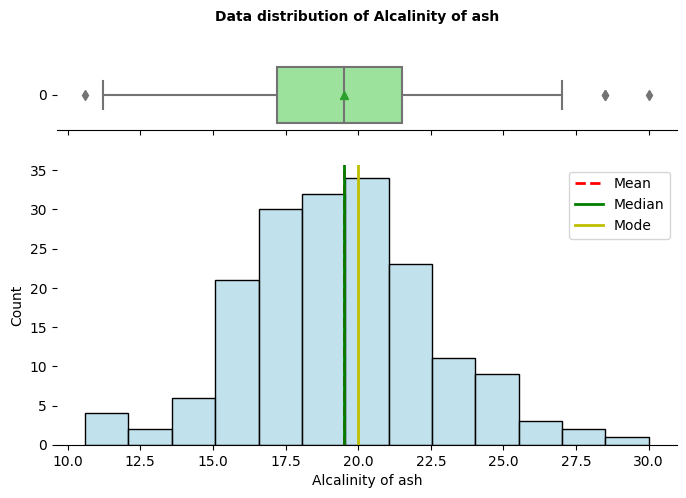

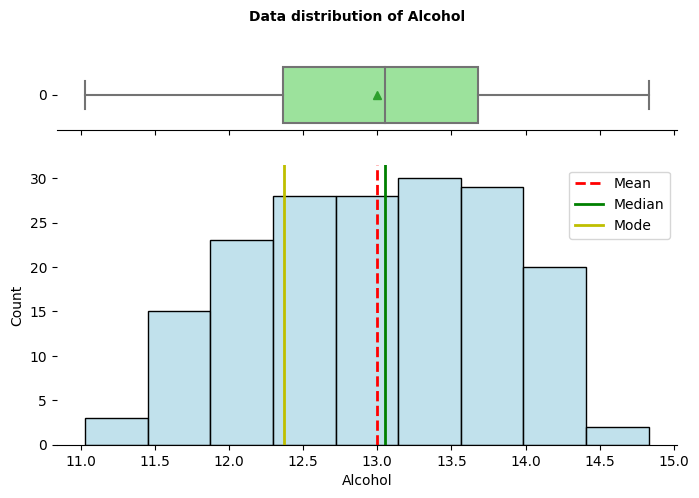

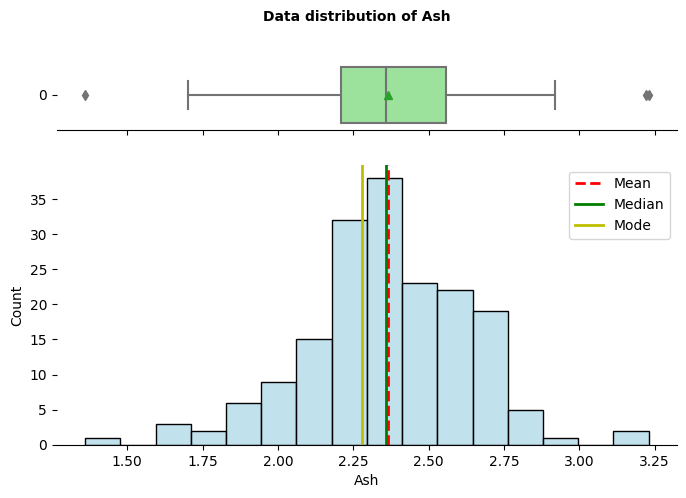

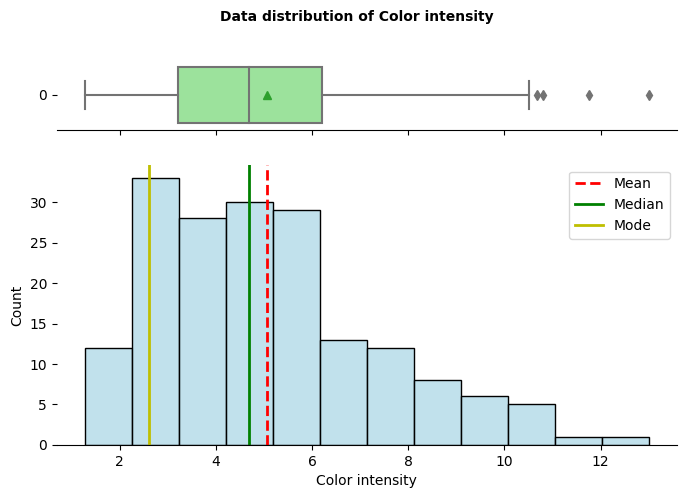

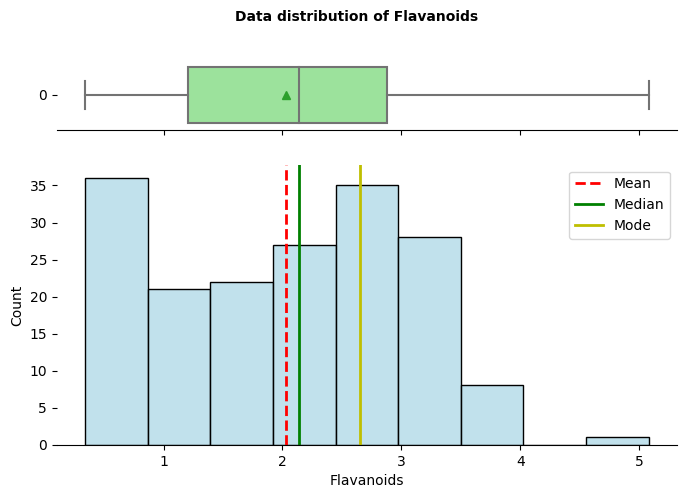

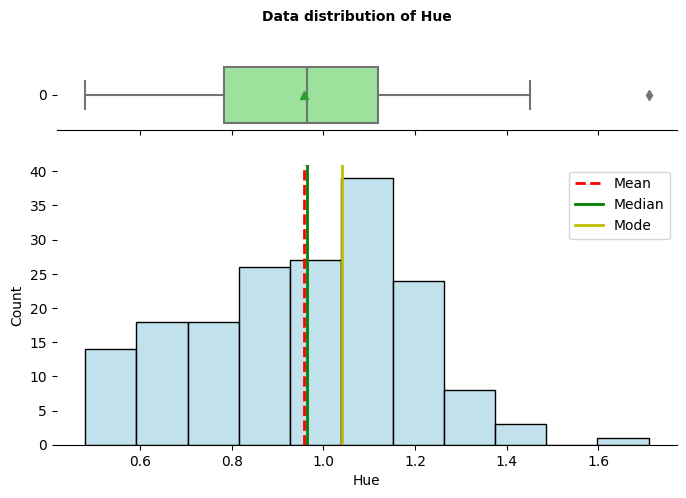

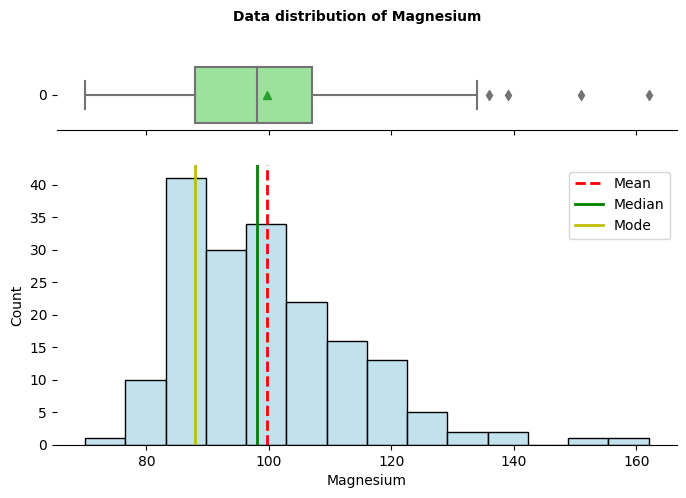

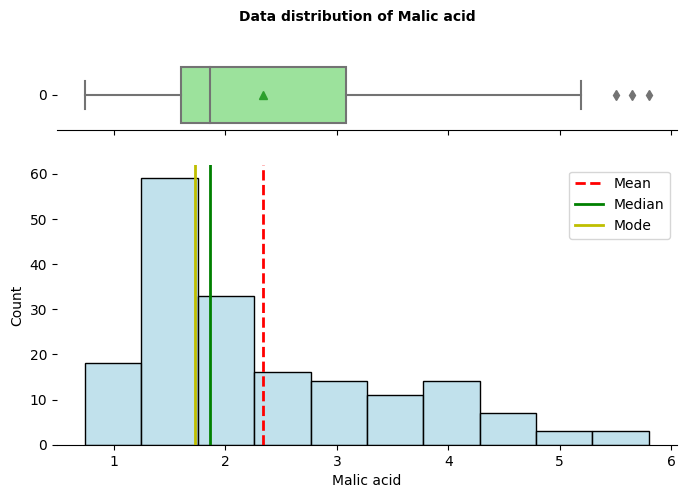

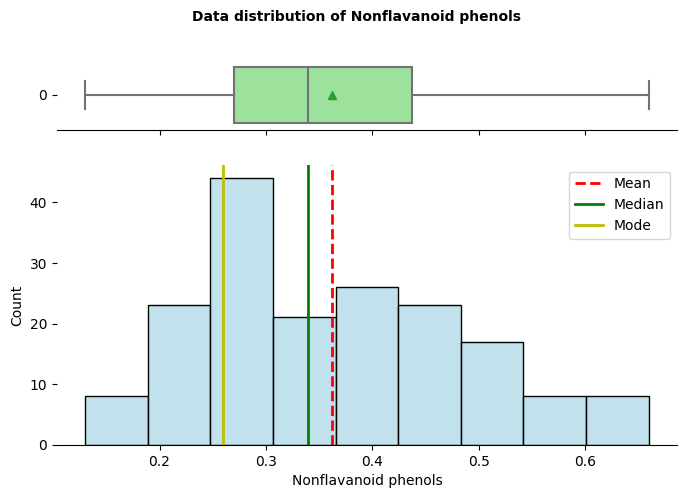

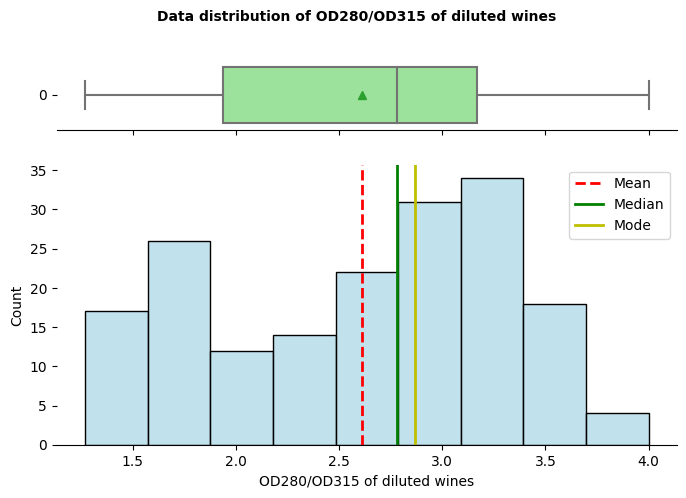

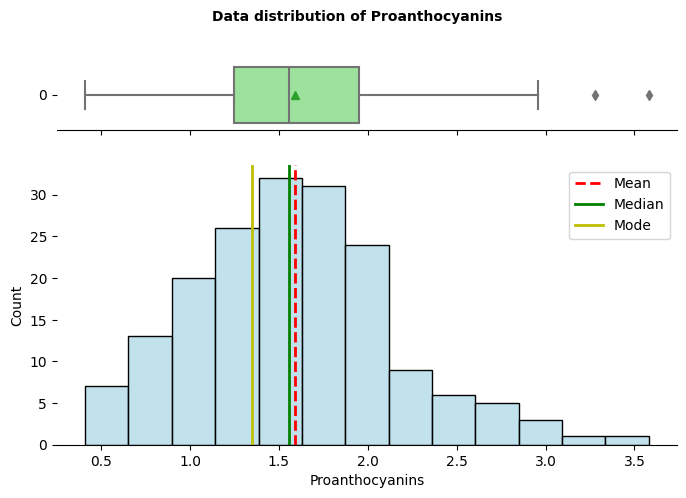

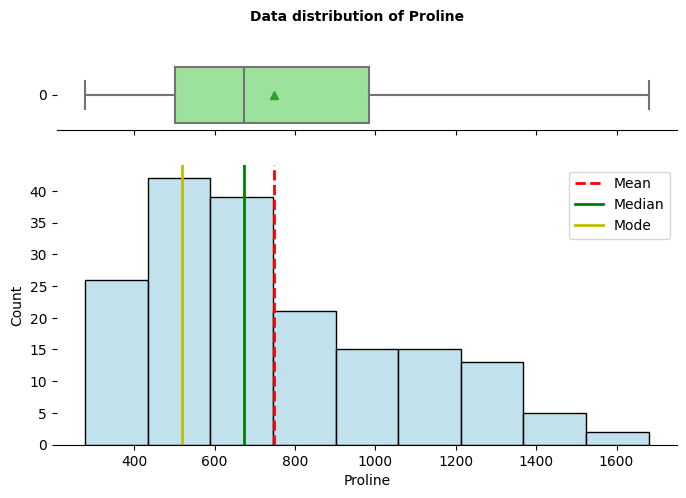

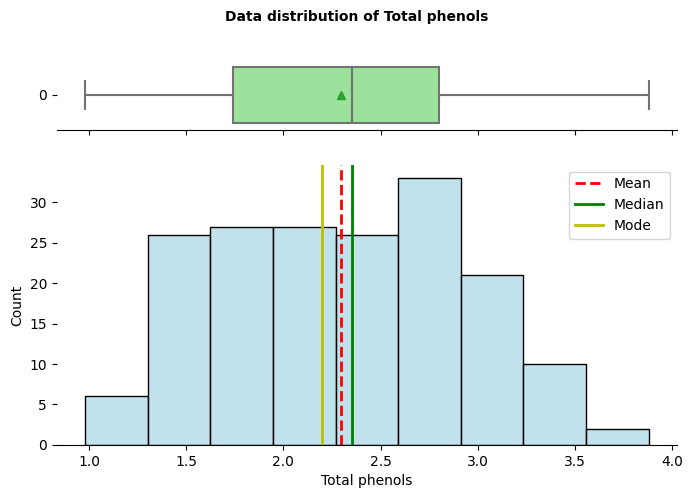

In [64]:
# Plots of numeric columns
for i in df_wine[df_wine.columns.difference(['class'])]:
    creating_box_hist(i,df_wine)

Observations:
- Normal distibuted variables: `Alcalinity of ash`,

- Right-skewed variables: `Alcohol`, `Ash`,  `Color intensity`, `Magnesium`, `Malic Acid`, `Nonflavanoid phenols`, `Proanthocyanins`, `Proline`, `Total Phenols`,

- Left-skewed variables: ` Flavanoids`, `Hue`, `OD280/OD315 of diluted wines`

- As shown through the boxplots, there are no outliers in the data

### Train and Test Split

In [12]:
X = df_wine.drop(['class'], axis=1)
Y = df_wine['class']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 1234,stratify=Y)



### Decision Trees


In [13]:
#Counting the number of samples for each class
print("Number of samples that belong to class 1: ", str(len(df_wine[df_wine['class']==1])),len(df_wine[df_wine['class']==1])/len(df_wine), '%')
print("Number of samples that belong to class 2: ", str(len(df_wine[df_wine['class']==2])),len(df_wine[df_wine['class']==1])/len(df_wine), '%')
print("Number of samples that belong to class 3: ", str(len(df_wine[df_wine['class']==3])),len(df_wine[df_wine['class']==1])/len(df_wine), '%')

Number of samples that belong to class 1:  59 0.33146067415730335 %
Number of samples that belong to class 2:  71 0.33146067415730335 %
Number of samples that belong to class 3:  48 0.33146067415730335 %


- As seen above, this dataset is completely balanced, where each class takes up 33% of the whole dataset.
- Since Decision Trees are scale invariant models, we will not perform feature scaling at this point.


#### Tree Model 1

In [33]:
tree_1 = tree.DecisionTreeClassifier(criterion = 'gini', random_state=1)
tree_1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
def evaluate(model):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # accuracy
    print("#"*20)
    print("Accuracy on train: ", accuracy_score(y_true = y_train, y_pred = y_train_predict))
    print("Accuracy on test: ", accuracy_score(y_test, y_test_predict))
    print("#"*20)
    print("Recall on train: ", recall_score(y_true = y_train, y_pred = y_train_predict,average = 'macro'))
    print("Recall on test: ", recall_score(y_true = y_test, y_pred = y_test_predict,average = 'macro'))
    print("#"*20)
    print("Precision on train: ", precision_score(y_true = y_train, y_pred = y_train_predict,average = 'macro'))
    print("Precision on test: ", precision_score(y_true = y_test, y_pred = y_test_predict,average = 'macro'))

    print("#"*20)

    # plot confusion matrices
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_predict)
    cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['class 1', 'class 2', 'class 3'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_predict)
    cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['class 1','class 2','class 3'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")


    plt.show()

      

####################
Accuracy on train:  1.0
Accuracy on test:  0.9166666666666666
####################
Recall on train:  1.0
Recall on test:  0.9111111111111111
####################
Precision on train:  1.0
Precision on test:  0.9411764705882352
####################


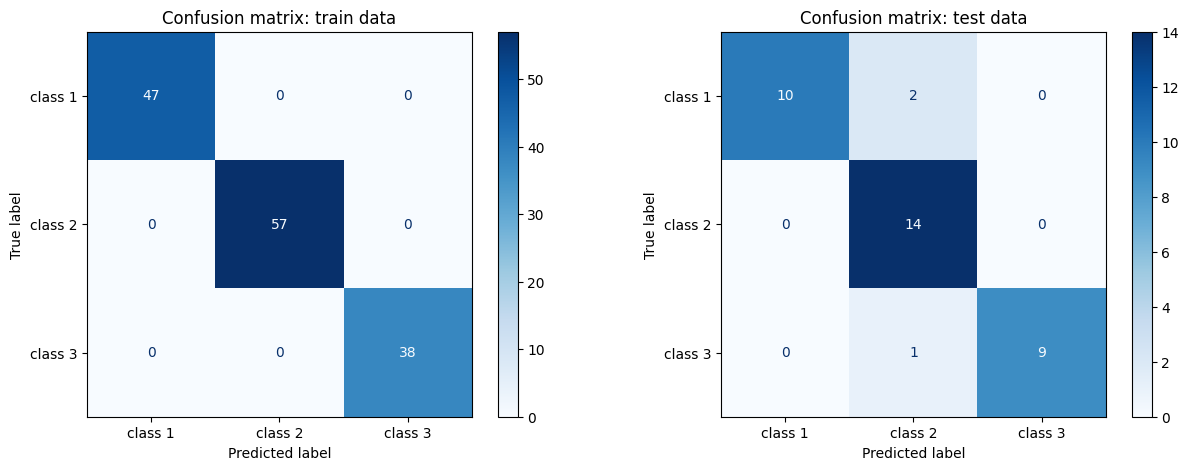

In [34]:
evaluate(tree_1)

- As seen above the model performs perfectly on train set, which suggests that our model may be overfitted.

In [36]:
features = list(X_train)

In [86]:
def plottree(model):
    plt.figure(figsize=(20,30))
    plot = tree.plot_tree(model,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
    for o in plot:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()

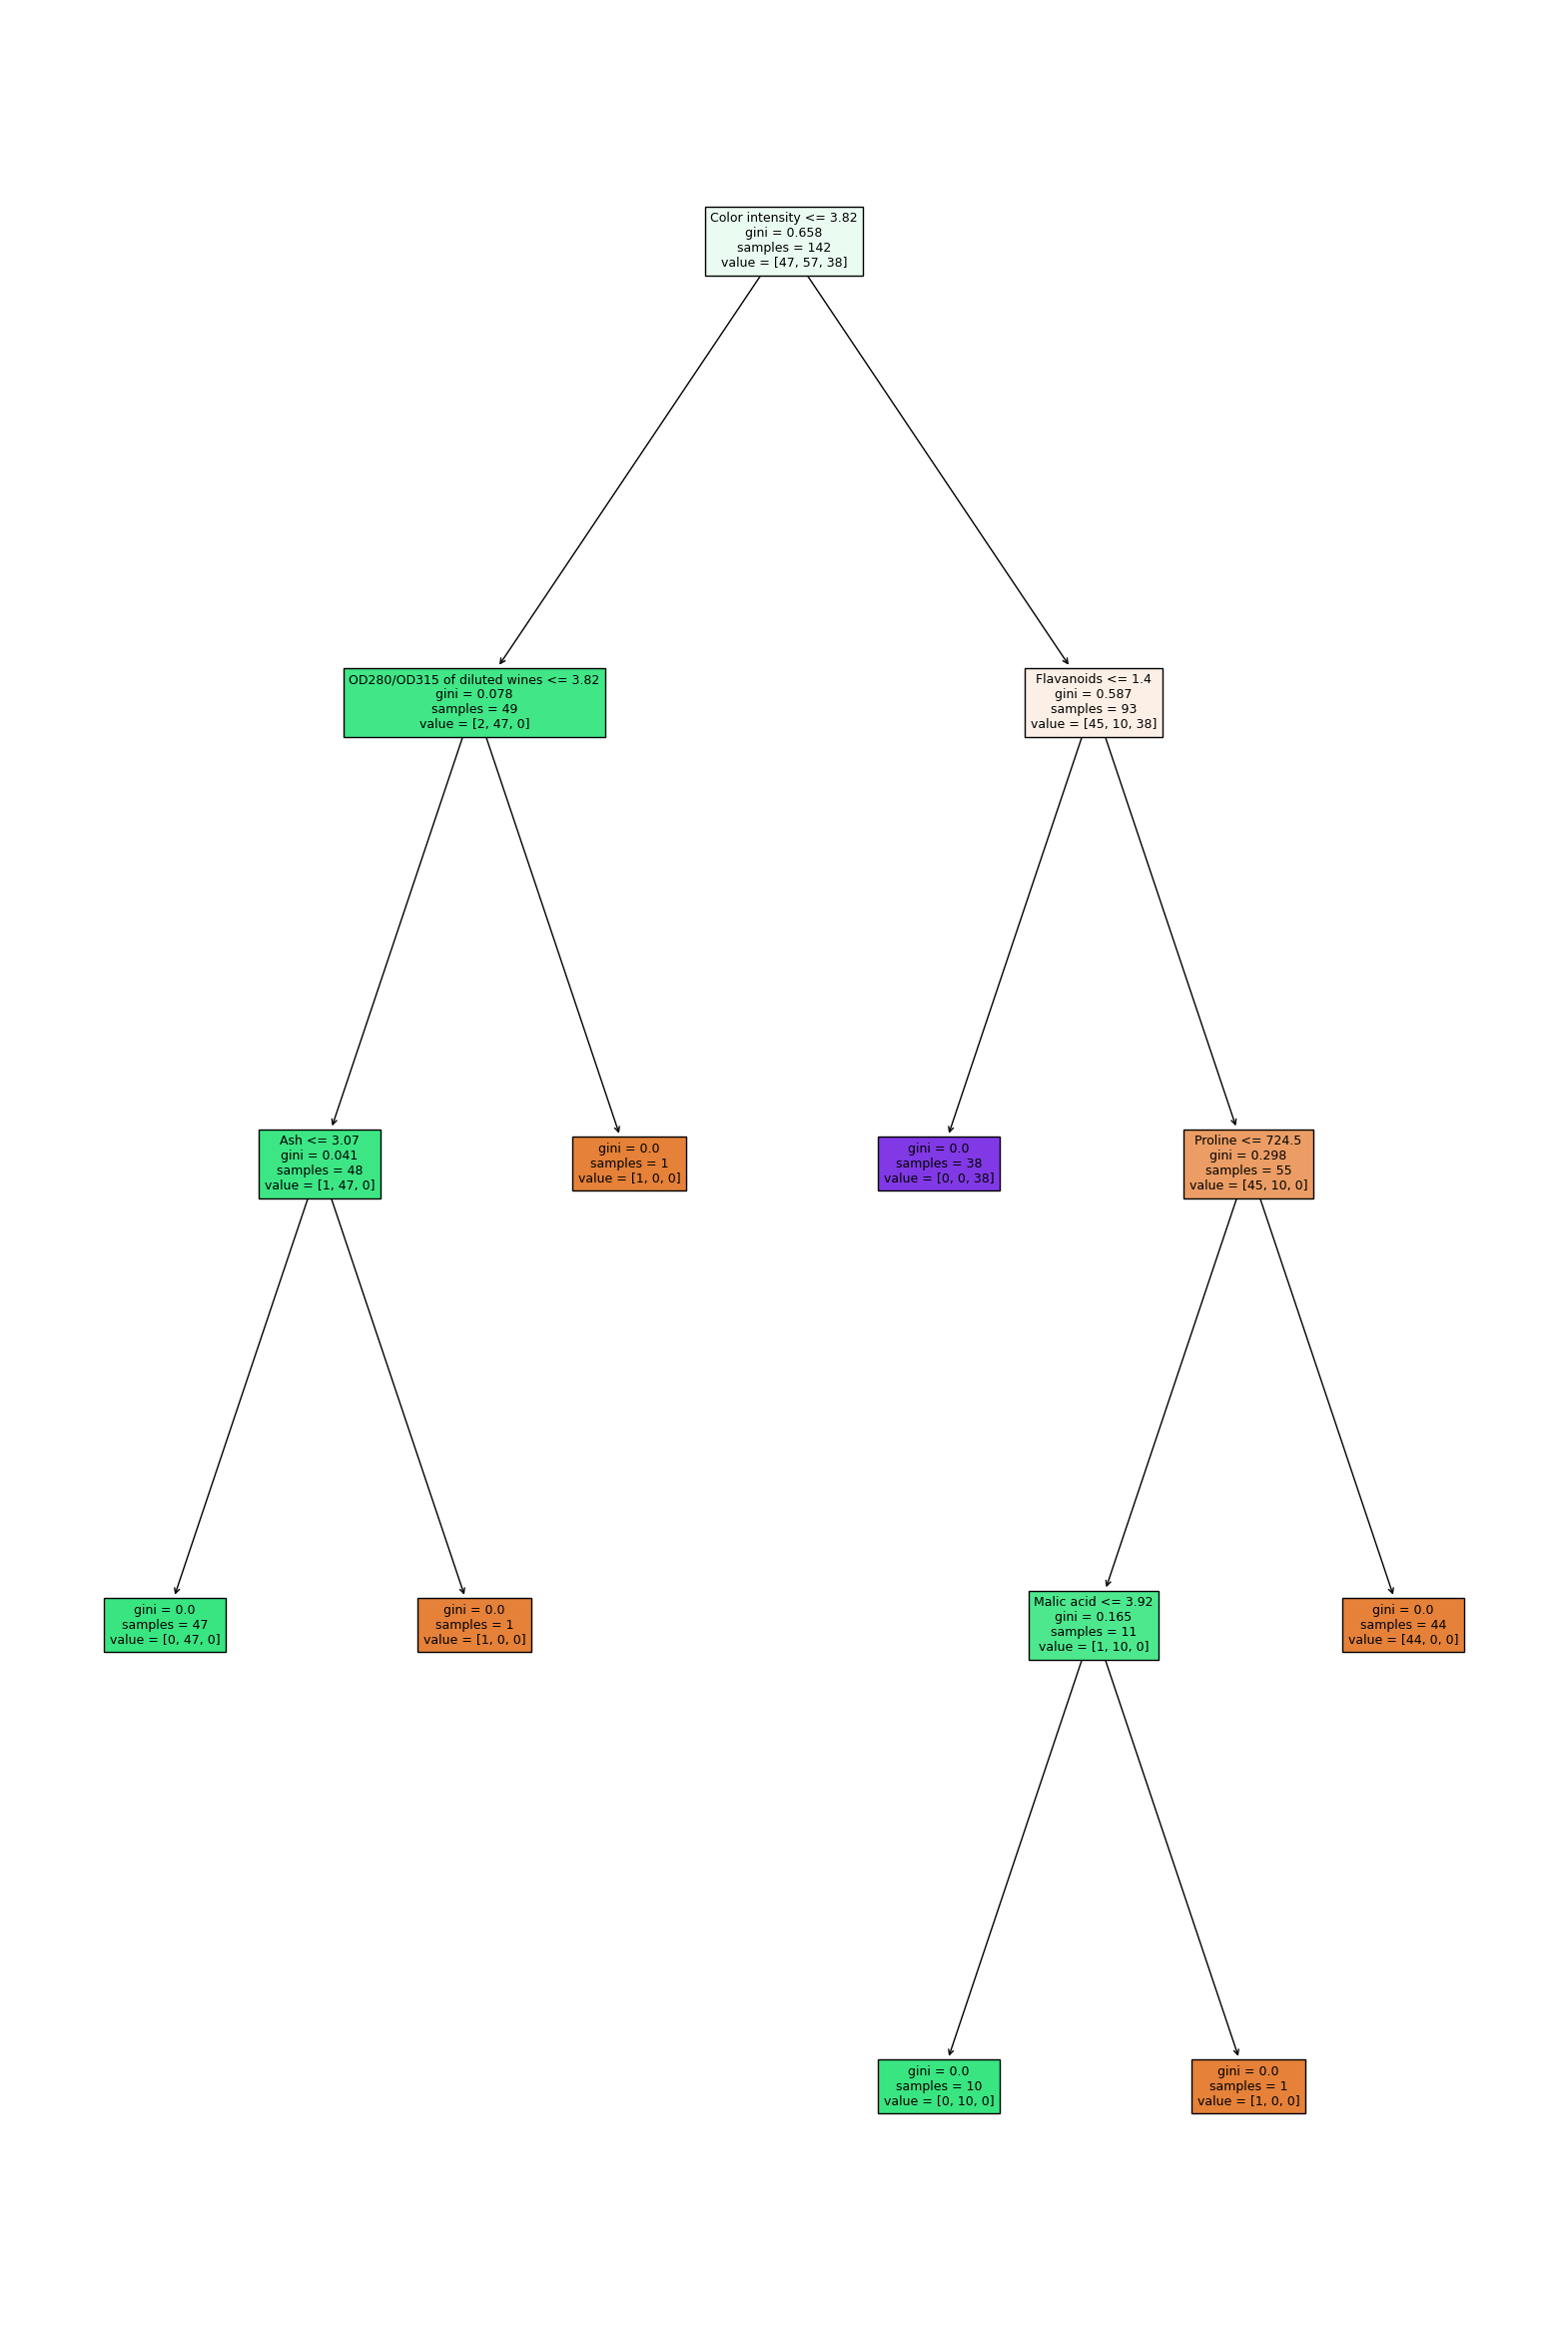

In [88]:
plottree(tree_1)

In [66]:
def plot_features(model):
    feat_dict= {}
    for col, val in sorted(zip(features, model.feature_importances_),key=lambda x:x[1],reverse=True):
        feat_dict[col]=val
    feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
    values = feat_df.Importance    
    idx = feat_df.Feature
    plt.figure(figsize=(10,8))
    clrs = ['navy']
    sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict client subscription')
    plt.show()

Observations:
- As seen above `Flavanoids`is the most important feature in our tree model.
- Other important features include `Color Intensity`, `Proline`, `Ash`, `OD280/OD315 of diluted wines` and `Malic Acid`.
- The rest of the features offers no contribution to the model.

#### Tree model 2

In [94]:
tree_2 = tree.DecisionTreeClassifier(max_depth = 5,max_leaf_nodes = 20,random_state=1,criterion = 'log_loss')
tree_2.fit(X_train,y_train)


DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_leaf_nodes=20,
                       random_state=1)

####################
Accuracy on train:  1.0
Accuracy on test:  0.9722222222222222
####################
Recall on train:  1.0
Recall on test:  0.9666666666666667
####################
Precision on train:  1.0
Precision on test:  0.9777777777777779
####################


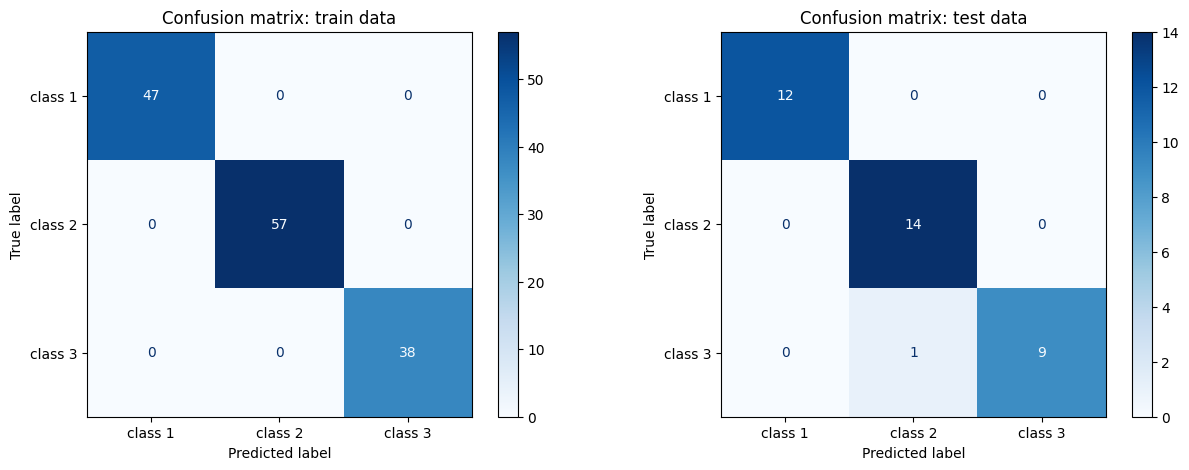

In [95]:
evaluate(tree_2)

Observations:
- This model is obviosly still overfitted on the train set.
- On test, the performance is better though.

#### Grid Search for parameter tuning

In [96]:
estimator  = tree.DecisionTreeClassifier(random_state=1)

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'criterion': ['gini','entropy','log_loss']
              }
              
scorer = make_scorer(accuracy_score)

grid = GridSearchCV(estimator = estimator,param_grid = parameters,scoring = scorer, cv = 5)
grid = grid.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=10,
                       random_state=1)

##### Best Tree Model

In [97]:
#best combination
tree_best = grid.best_estimator_
tree_best


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=10,
                       random_state=1)

####################
Accuracy on train:  0.9929577464788732
Accuracy on test:  0.9722222222222222
####################
Recall on train:  0.9929078014184397
Recall on test:  0.9666666666666667
####################
Precision on train:  0.9942528735632185
Precision on test:  0.9777777777777779
####################


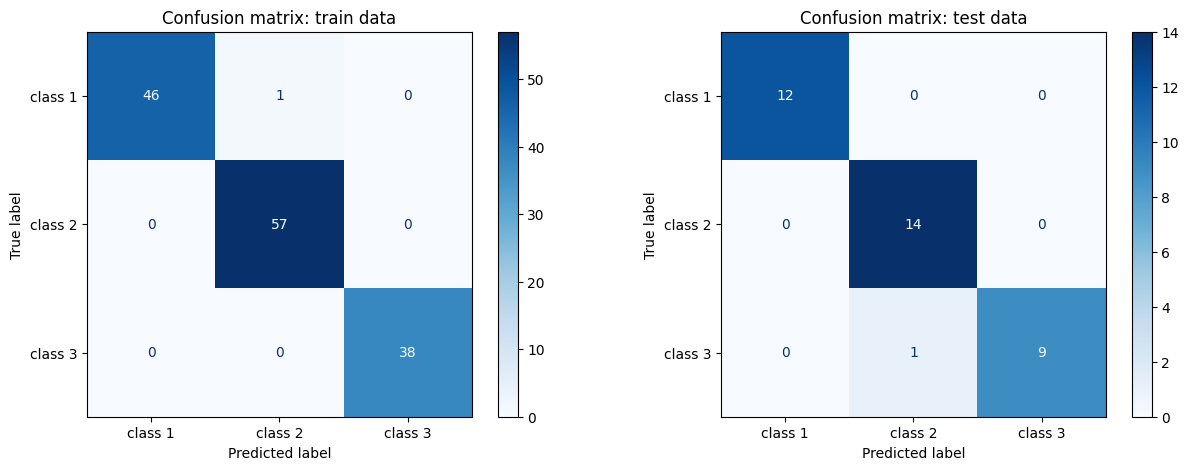

In [98]:
#fitting and evaluating the best model
tree_best.fit(X_train,y_train)
evaluate(tree_model_best)

Observations:
- As seen above, using this new estimator with parameters `max_depth=3, max_leaf_nodes=10, random_state=1` and `criterion = entropy` instead of gini, resulted in a slight decrease of the model overfit.
- However, there was no improvement in scores when compared to random model Tree 2.

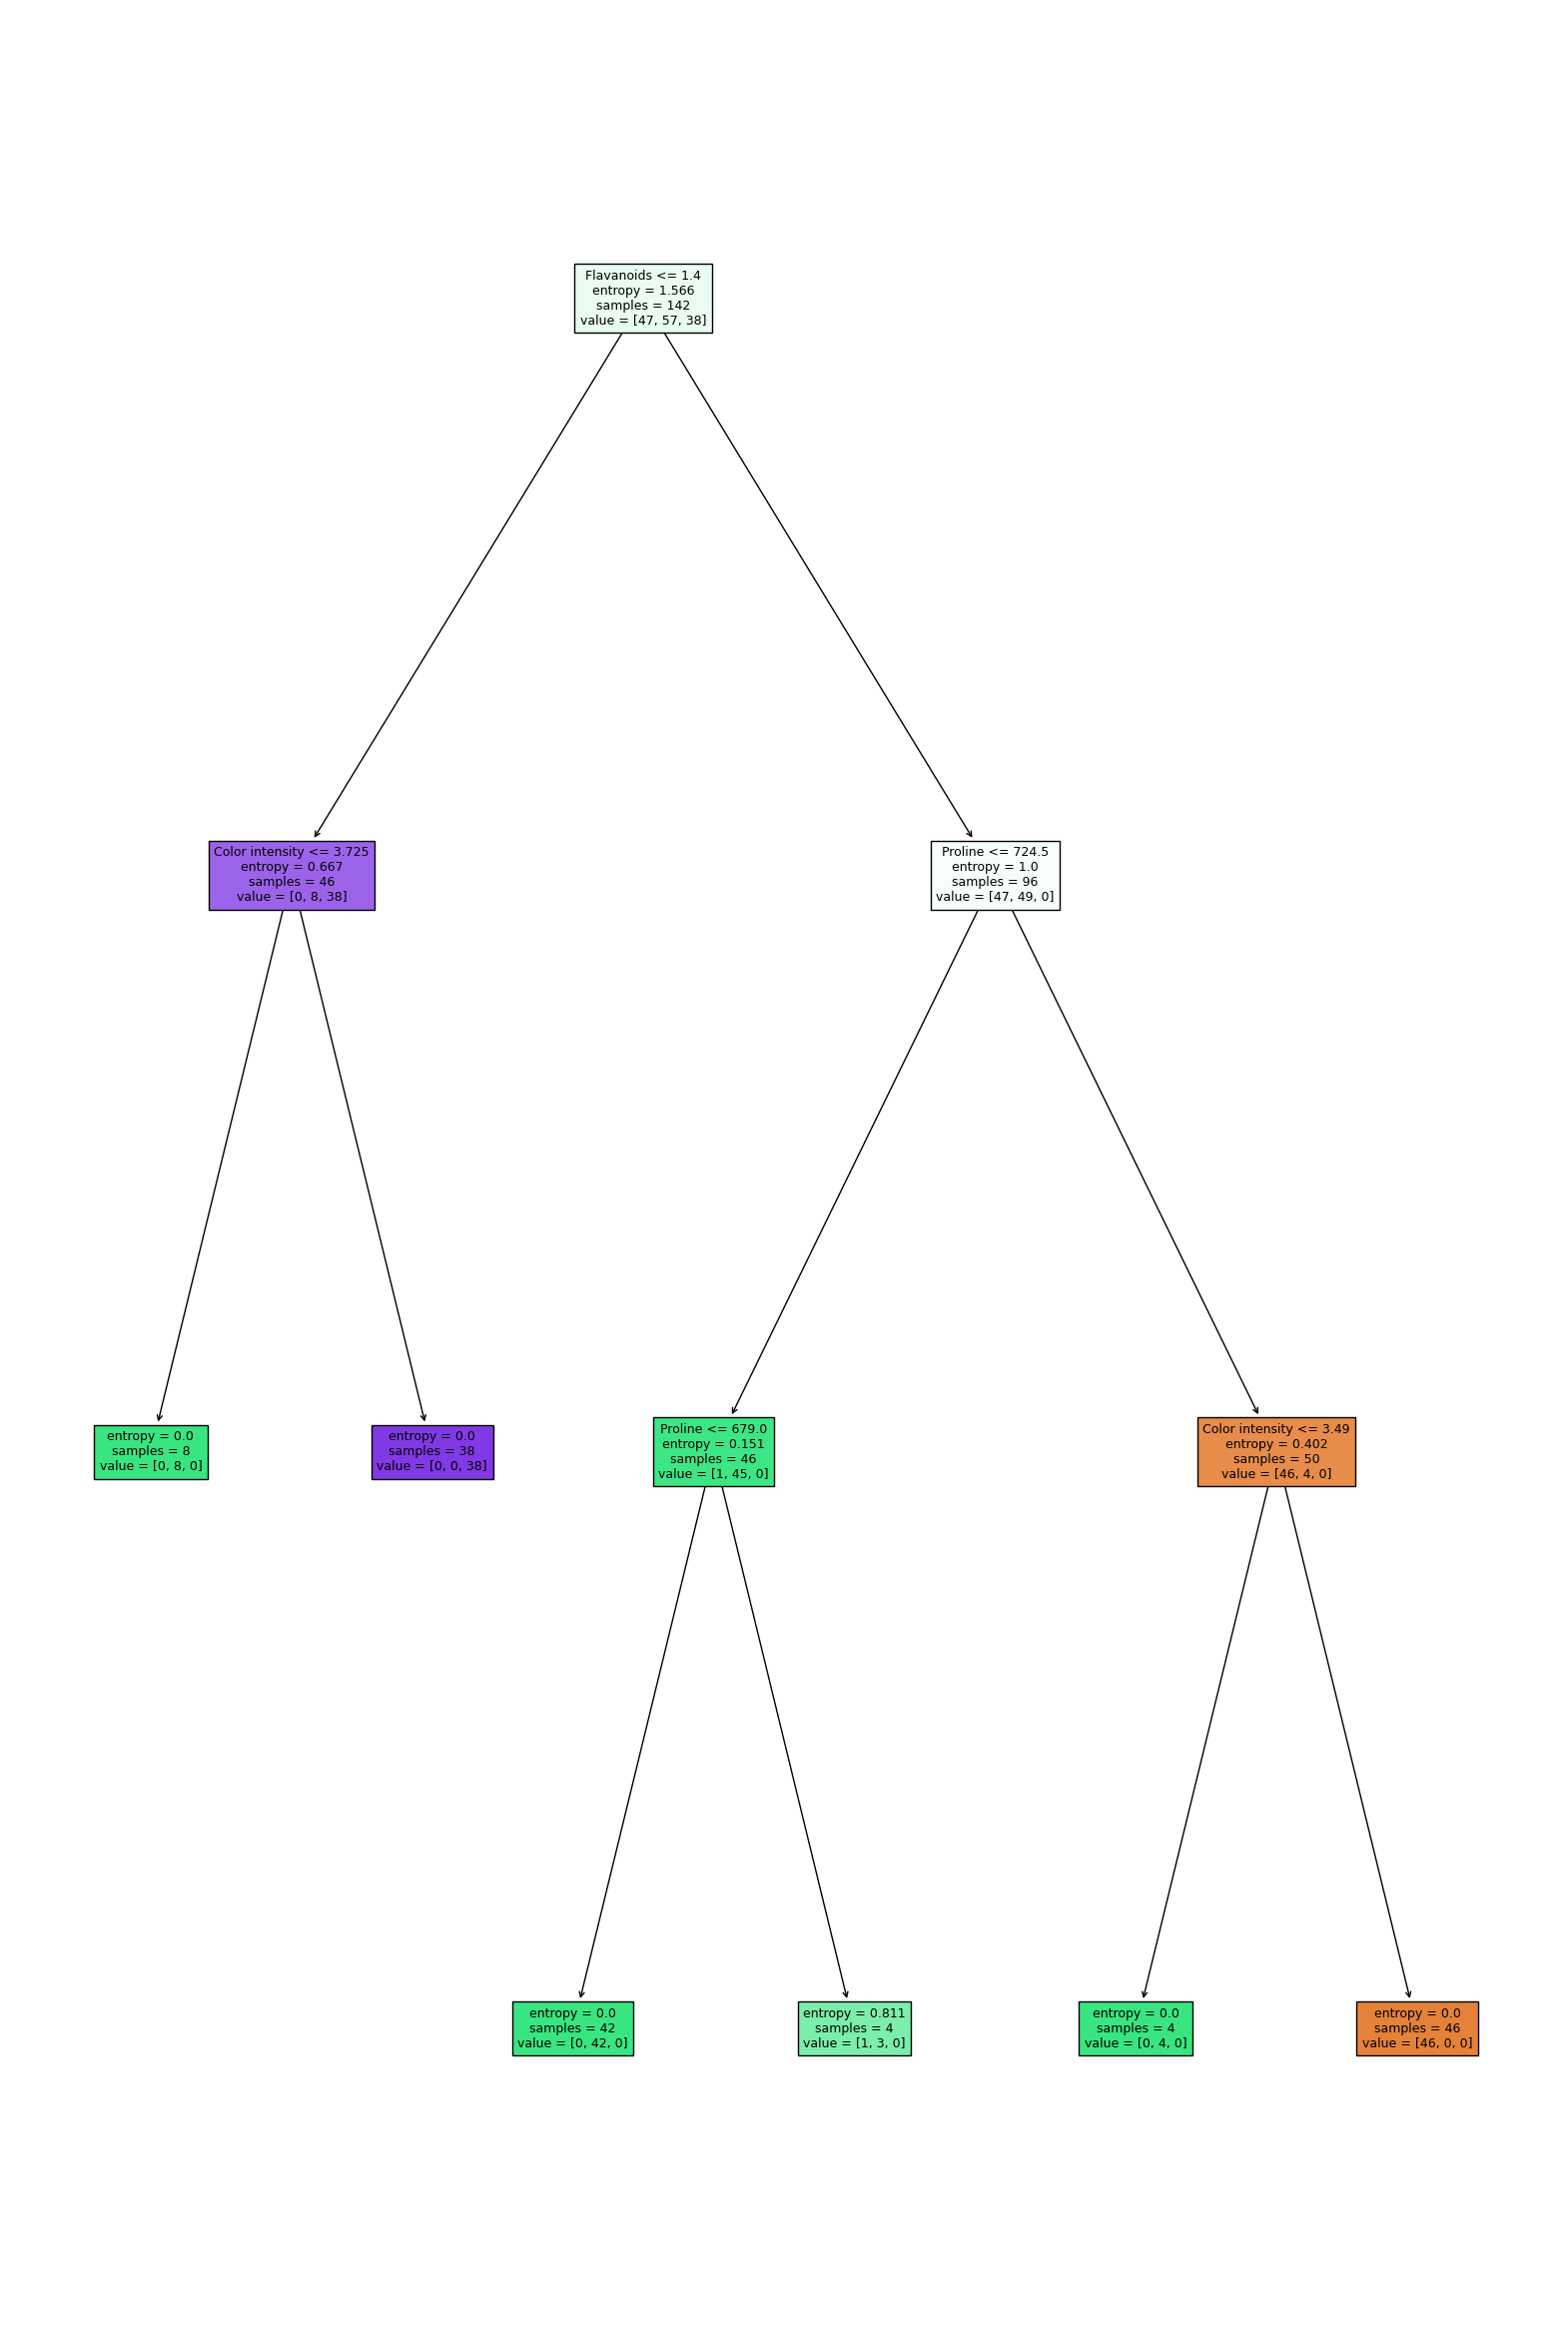

In [101]:
plottree(tree_best)

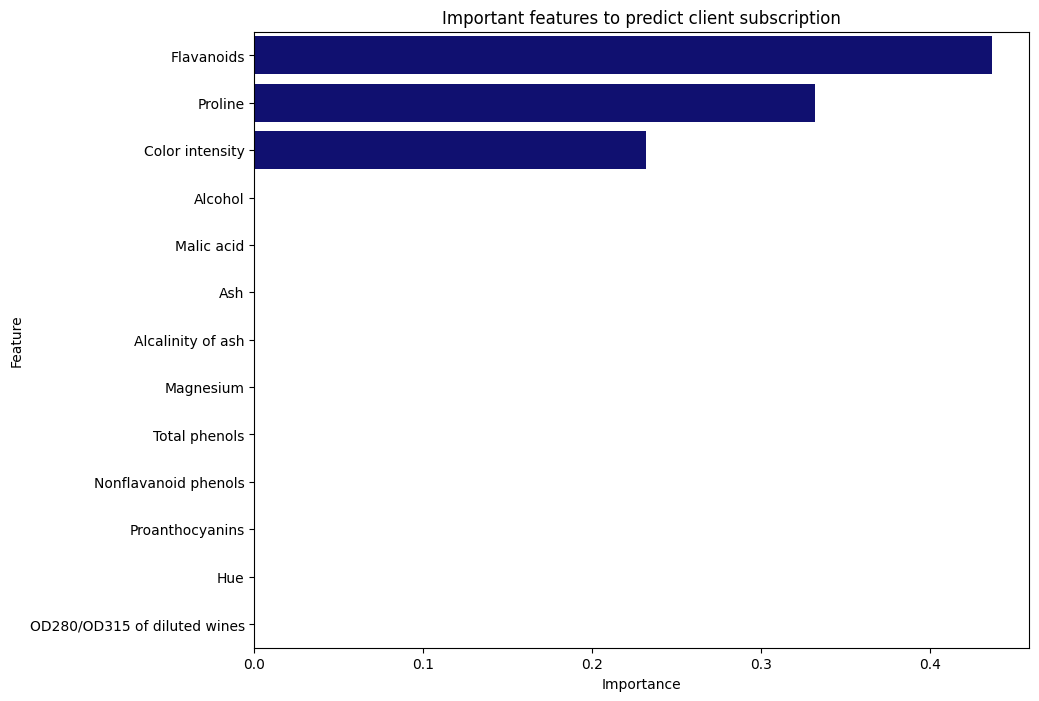

In [102]:
plot_features(tree_best)

Observations:
- The most important features according to the best model include `Flavanoids`, `Proline`, `Color intensity`.

#### Cost Complexity Pruning

In [103]:
ccp = tree.DecisionTreeClassifier(random_state = 1).cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = ccp.ccp_alphas, ccp.impurities

In [128]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=1,ccp_alpha = ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

In [134]:
def plot_ccp(clfs):
        fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas
        train_scores = [clf.score(X_train, y_train) for clf in clfs]
        test_scores = [clf.score(X_test, y_test) for clf in clfs]
        ax.set_xlabel("alpha")
        ax.set_ylabel("accuracy")
        ax.set_title("Accuracy vs alpha for training and testing sets")
        ax.plot(ccp_alphas, train_scores, marker='o', label="train",
                drawstyle="steps-post")
        ax.plot(ccp_alphas, test_scores, marker='o', label="test",
                drawstyle="steps-post")
        ax.legend()
        plt.show()


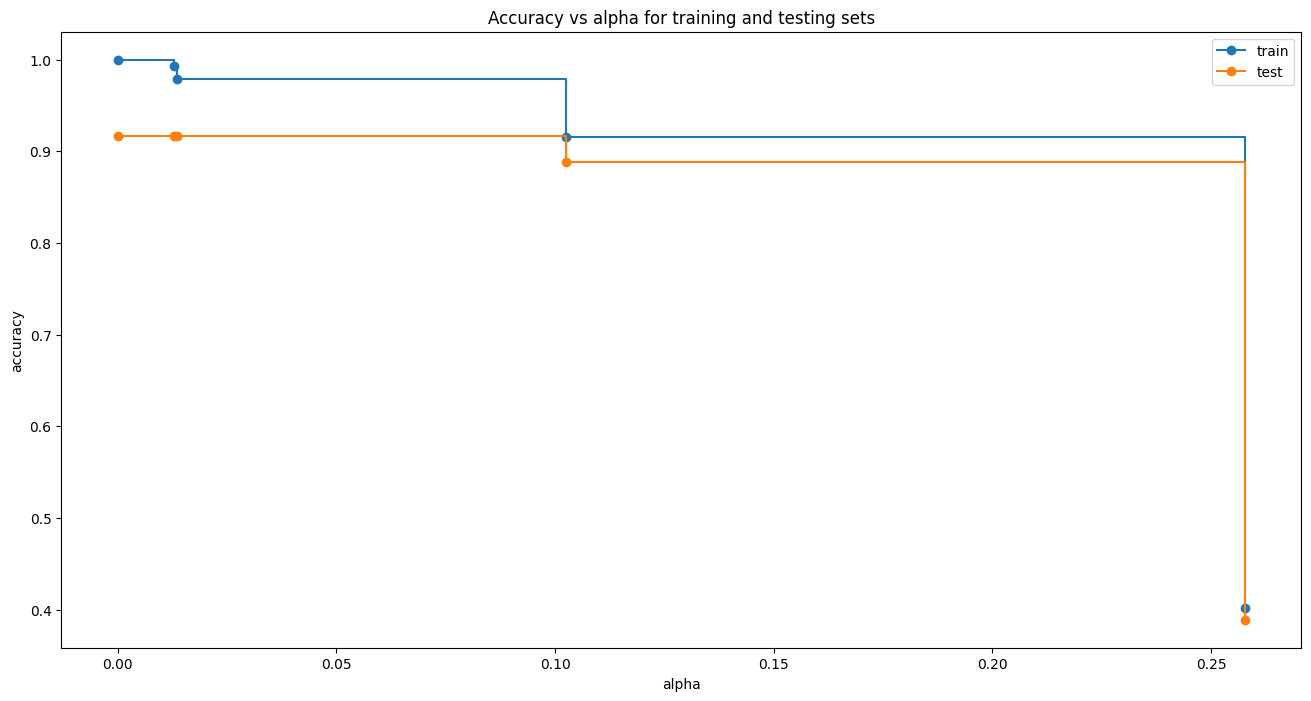

In [135]:
plot_ccp(clfs)

Observations:
- `ccp_alpha` is the cost complexity parameter which can be used to prune the tree. The higher ccp_alpha, the higher the number of nodes that are pruned.
- As seen above, even a post pruning of the tree will not improve the performance on test. However, a `ccp_alpha` of 0.010 will decrease the overfitting on train.



In [140]:
tree_pruned = tree.DecisionTreeClassifier(ccp_alpha = 0.10,random_state = 1)
tree_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.1, random_state=1)

####################
Accuracy on train:  0.9788732394366197
Accuracy on test:  0.9166666666666666
####################
Recall on train:  0.9787234042553191
Recall on test:  0.9111111111111111
####################
Precision on train:  0.9833333333333334
Precision on test:  0.9411764705882352
####################


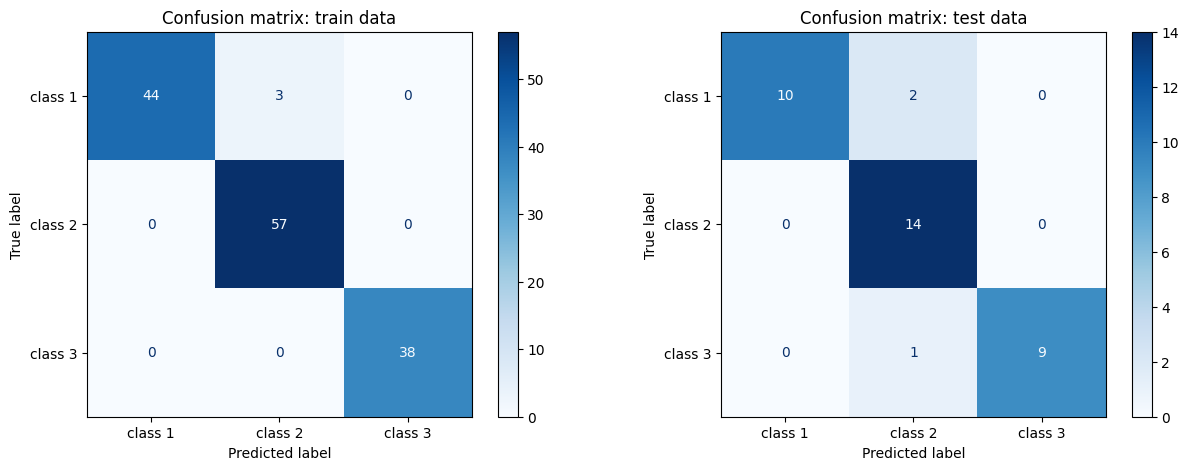

In [142]:
evaluate(tree_pruned)

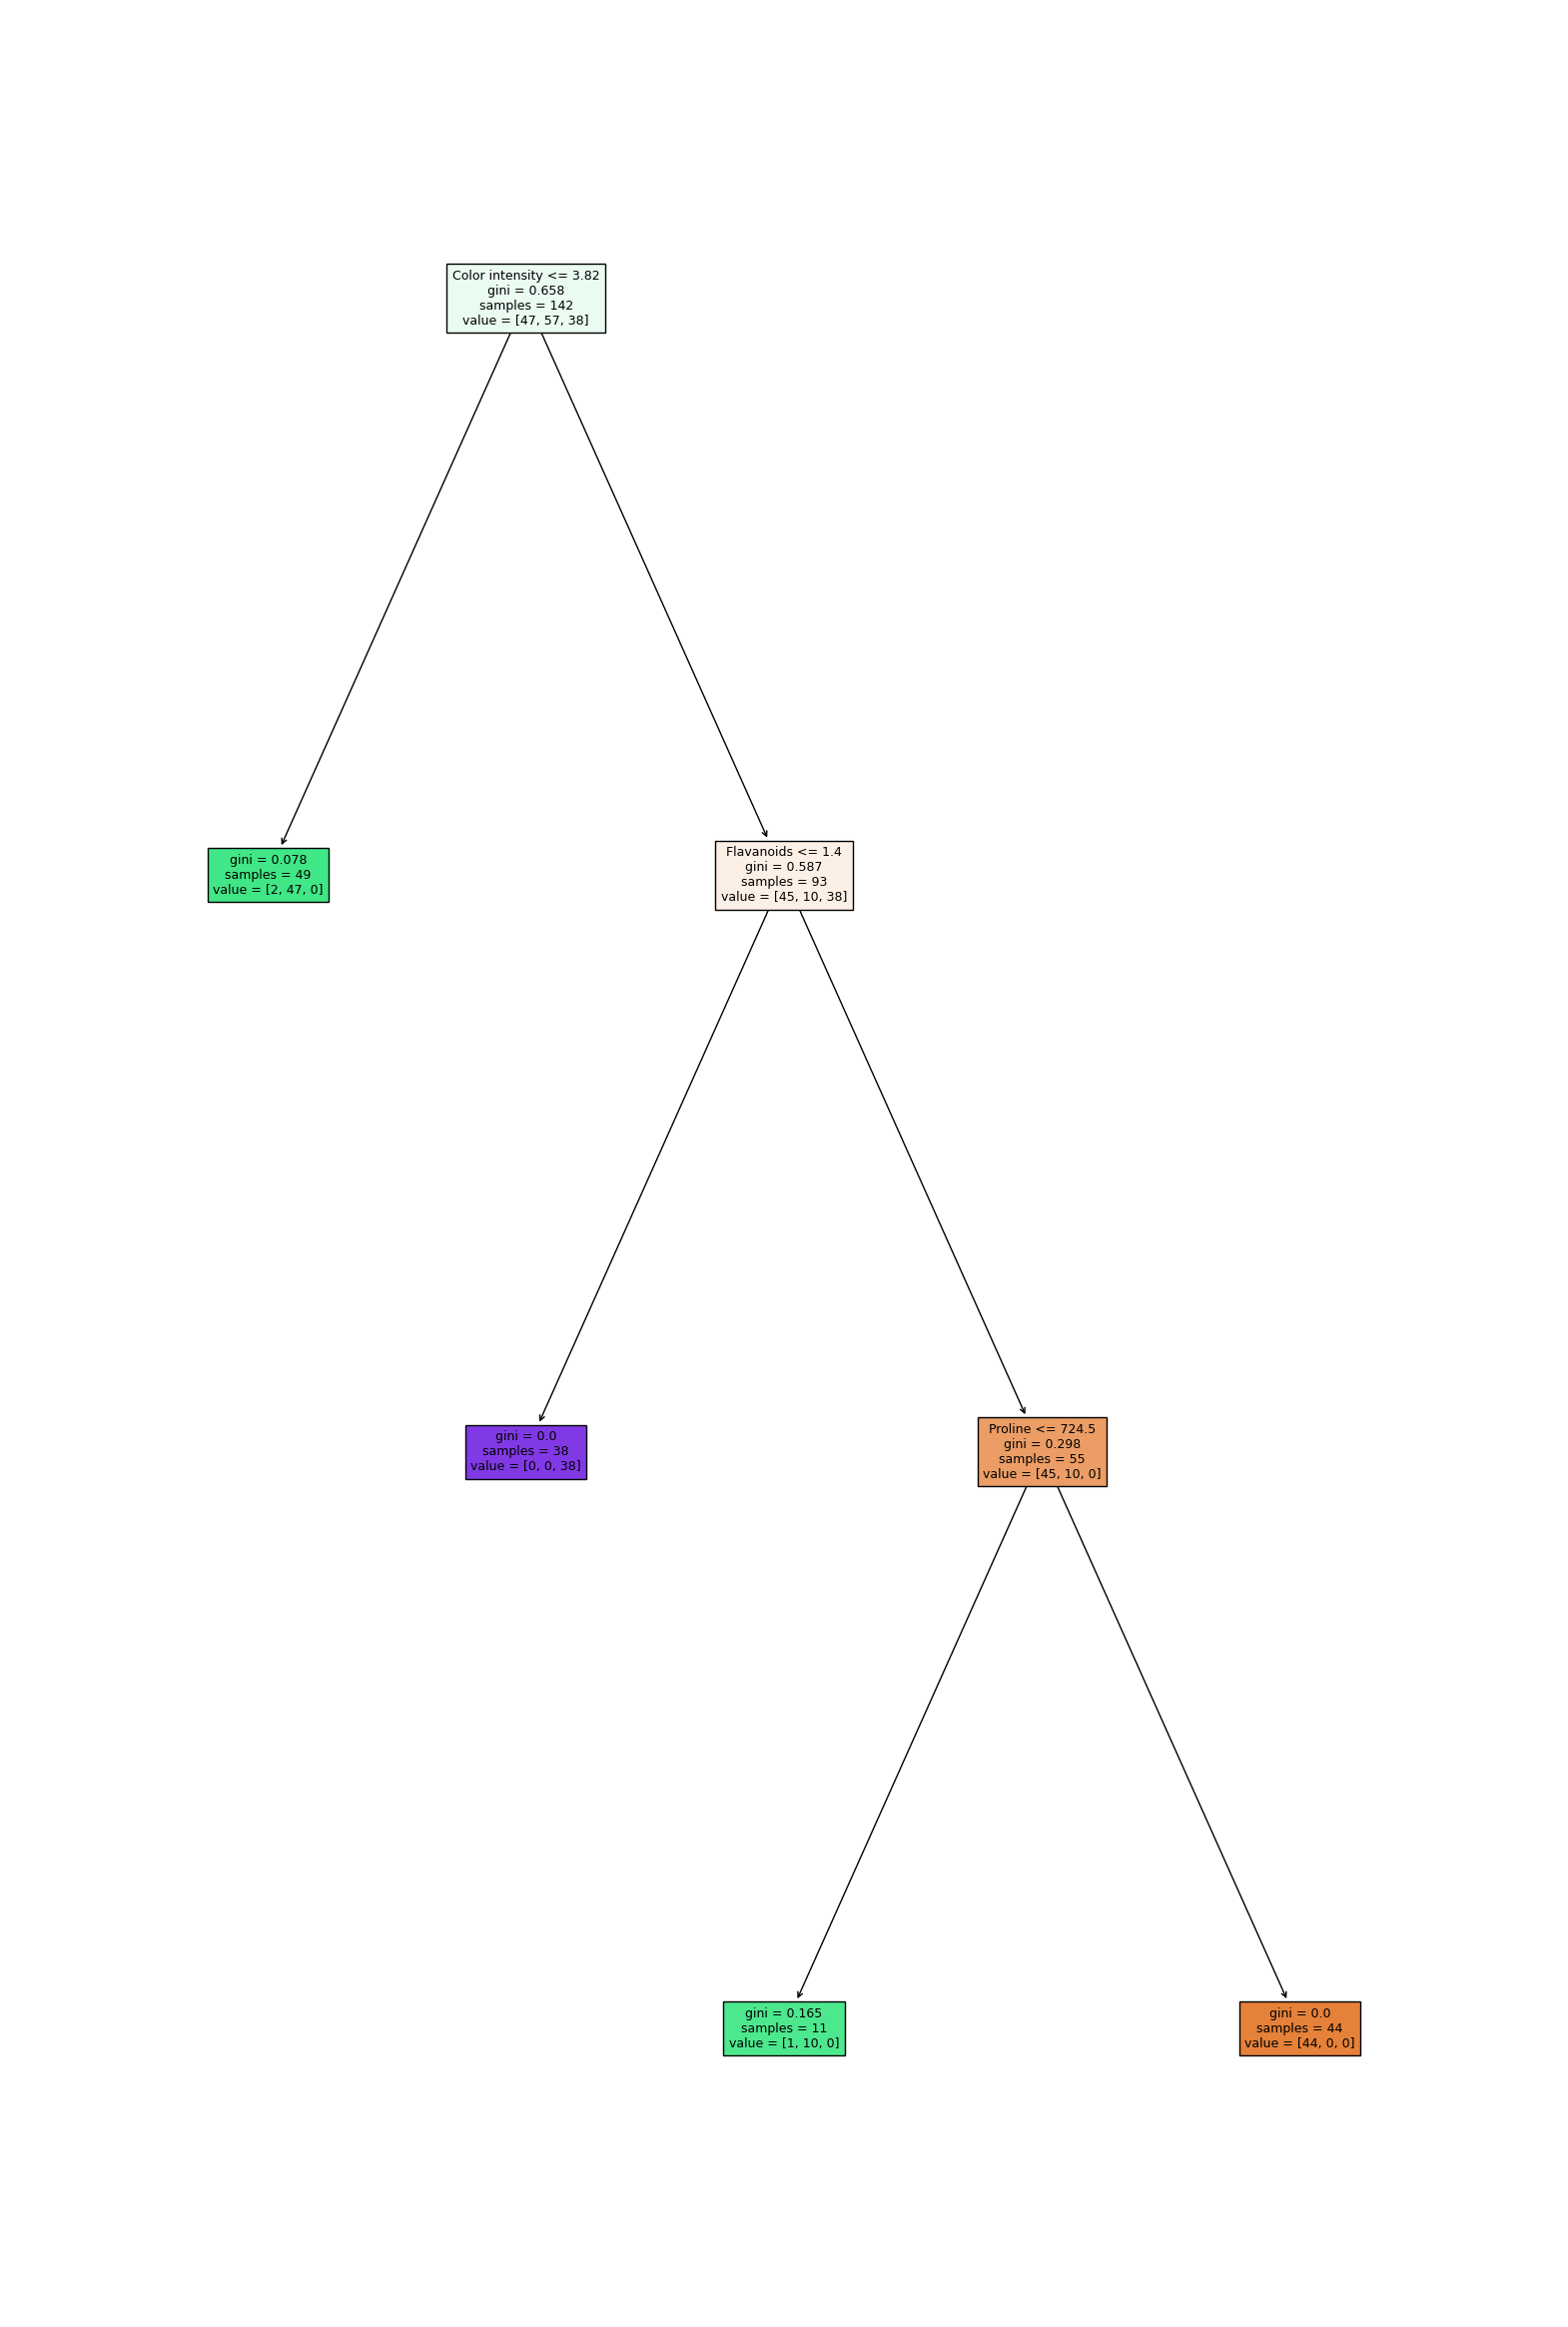

In [143]:
plottree(tree_pruned)

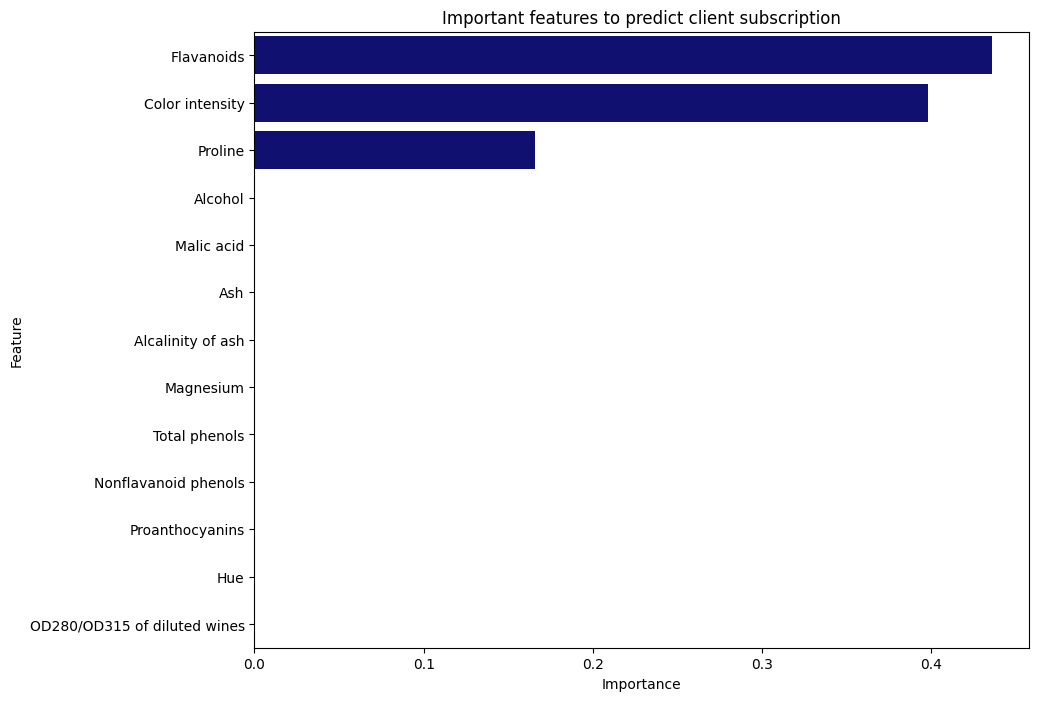

In [144]:
plot_features(tree_pruned)

Observations:
- The pruned tree leads to a decrease of performance on test. However, the overfit is slightly decreased from 99% to 97%. I think choosing this model could lead to better predictive power for unseen data. Moreover, an accuracy of 91% on test is relatively good.

### k-NN Classifier

In [118]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [19]:
y_train.head()

82     2
121    2
174    3
160    3
71     2
Name: class, dtype: int64

Since k-NN classifier relies on distance, scaling (Z-score standardisation) is a must!
Scikit implementation doesn't do it implicitly (tried, maybe need some extra arguments? pipeline!!! - used it later). However, let's ensure that all variables have mean of 0 and standard deviation of 1.

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)

print('TRAINING')
print('Original data:')
print('Mean:')
print(X_train.mean(axis=0))
print('Std:')
print(X_train.std(axis=0))
print()
print('Standardized data:')
print('Mean:')
print(X_train_standardized.mean(axis=0))
print('Std:')
print(X_train_standardized.std(axis=0))

print('#'*100)


print('TESTING')
print('Original data:')
print('Mean:')
print(X_test.mean(axis=0))
print('Std:')
print(X_test.std(axis=0))
print()
print('Standardized data:')
print('Mean:')
print(X_test_standardized.mean(axis=0))
print('Std:')
print(X_test_standardized.std(axis=0))

X_train = X_train_standardized
X_test = X_test_standardized


TRAINING
Original data:
Mean:
Alcohol                          13.021831
Malic acid                        2.359718
Ash                               2.386972
Alcalinity of ash                19.584507
Magnesium                       100.077465
Total phenols                     2.311761
Flavanoids                        2.029366
Nonflavanoid phenols              0.366127
Proanthocyanins                   1.601901
Color intensity                   5.059718
Hue                               0.955465
OD280/OD315 of diluted wines      2.607394
Proline                         752.788732
dtype: float64
Std:
Alcohol                           0.824684
Malic acid                        1.171208
Ash                               0.269623
Alcalinity of ash                 3.450384
Magnesium                        14.688285
Total phenols                     0.629558
Flavanoids                        1.020996
Nonflavanoid phenols              0.125234
Proanthocyanins                   0.614098
Colo

In [123]:
def knn_evaluate(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['class 1', 'class 2', 'class 3'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['class 1','class 2','class 3'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")

    k = model.n_neighbors
    plt.tight_layout()
    plt.suptitle("k-NN classifier, k = " + str(k), fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

########################################
Accuracy on train:  0.9577464788732394
Accuracy on test:  0.9444444444444444
########################################
Recall on train:  0.9649122807017544
Recall on test:  0.9523809523809524
########################################
Precision on train:  0.95718954248366
Precision on test:  0.9444444444444445
########################################


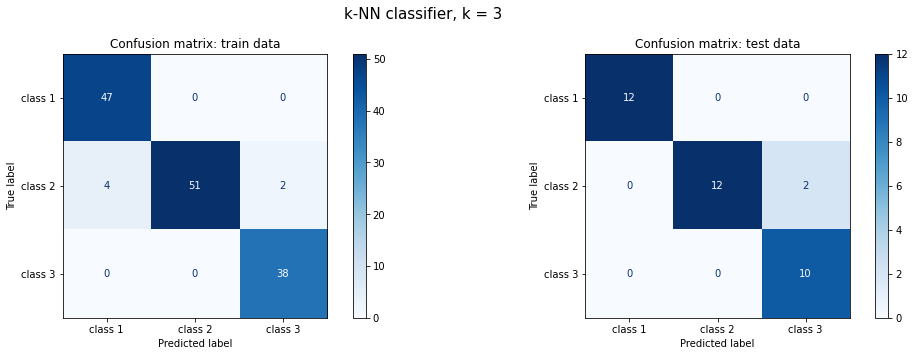

In [124]:
# 1st model
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn_1 = KNeighborsClassifier(n_neighbors=k)
knn_1.fit(X_train, y_train)

knn_evaluate(knn_1)

########################################
Accuracy on train:  0.9788732394366197
Accuracy on test:  0.9722222222222222
########################################
Recall on train:  0.9824561403508771
Recall on test:  0.9761904761904763
########################################
Precision on train:  0.9763888888888888
Precision on test:  0.9696969696969697
########################################


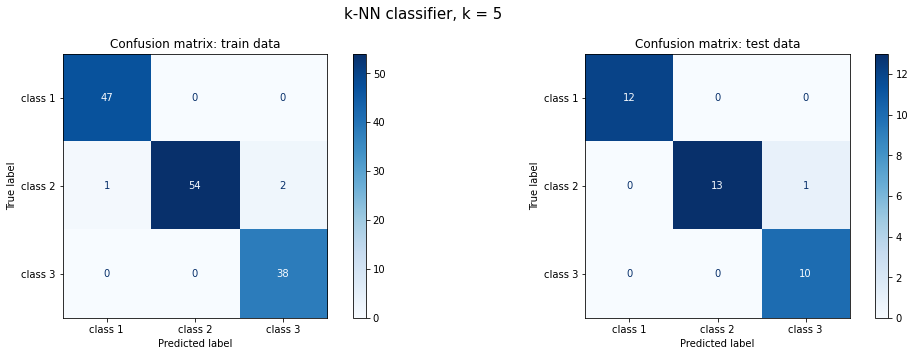

In [134]:
# 2nd model
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_2 = KNeighborsClassifier(n_neighbors=k)
knn_2.fit(X_train, y_train)

knn_evaluate(knn_2)

########################################
Accuracy on train:  0.971830985915493
Accuracy on test:  0.9722222222222222
########################################
Recall on train:  0.9736842105263158
Recall on test:  0.9761904761904763
########################################
Precision on train:  0.9715620219379618
Precision on test:  0.9743589743589745
########################################


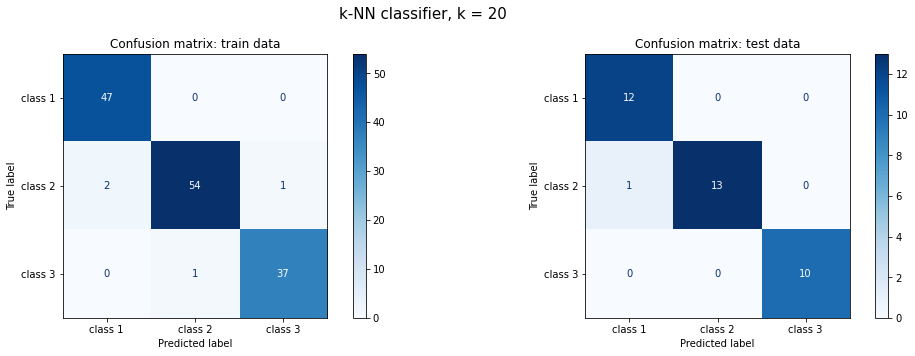

In [131]:
# 2nd model
from sklearn.neighbors import KNeighborsClassifier
k = 20
knn_3 = KNeighborsClassifier(n_neighbors=k)
knn_3.fit(X_train, y_train)

knn_evaluate(knn_3)

### 1. Holdout method
Since the performance of classifier depends greatly on training + testing split, in order to obtain a more objective measure of performance, the holdout method can be used.


In [135]:
def hold_out(k):
    N = 100
    accuracy_test = np.zeros(N)
    accuracy_train = np.zeros(N)
    for i in range(0, N):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i, stratify=Y)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)
        # accuracy
        accuracy_train[i] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
        accuracy_test[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, N+1, 1), accuracy_train, 'o-', color='darkblue', label='training set')
    plt.plot(np.arange(1, N+1, 1), accuracy_test, 'o-', color='royalblue', label='testing set')
    plt.legend()
    plt.title('Accuracy, holdout method, k-NN clasifier k = '+str(k))
    plt.ylabel('accuracy')


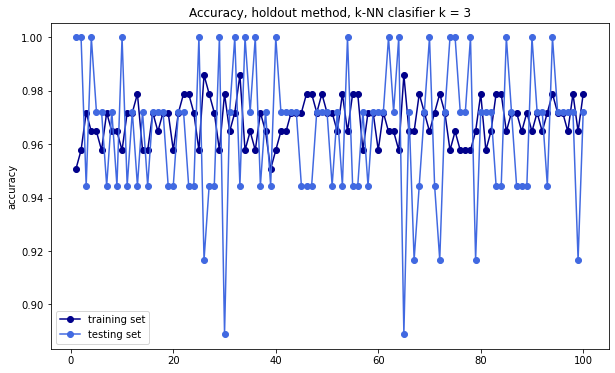

In [136]:
hold_out(k=3)

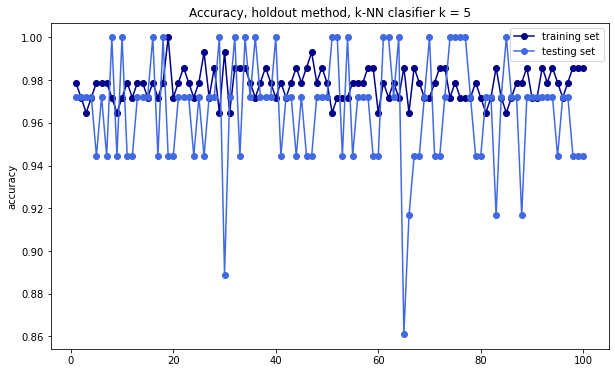

In [137]:
hold_out(k=5)

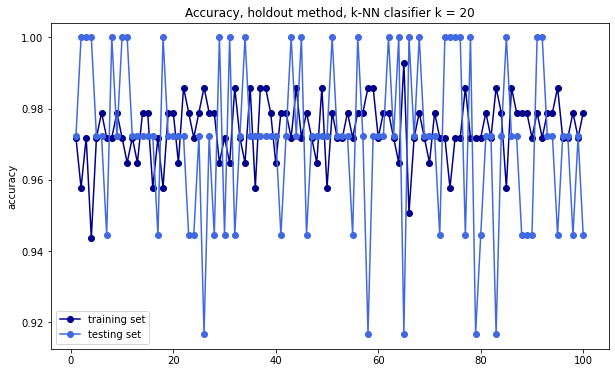

In [138]:
hold_out(k=20)

### 2. k-fold cross-validation


In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


def hold_out_and_cross_val(k):
    N = 100
    accuracy_test_hold_out = np.zeros(N)
    accuracy_train_hold_out = np.zeros(N)
    accuracy_test_cross_val = np.zeros(N)

    for i in range(0, N):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i, stratify=Y)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)
        # accuracy
        accuracy_test_hold_out[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        
        # perform k-fold cross-validation
        estimators = [('standardize', StandardScaler()), ('knn', KNeighborsClassifier())]
        pipeline = Pipeline(estimators)

        scores = cross_val_score(pipeline, X, Y, cv=10)
        accuracy_test_cross_val[i] = np.mean(scores)
        
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, N+1, 1), accuracy_test_cross_val, 'o-', color='darkblue', label='hold out')
    plt.plot(np.arange(1, N+1, 1), accuracy_test_hold_out, 'o-', color='royalblue', label='k-fold cross-validation')
    plt.legend()
    plt.title('Accuracy on testing set, holdout and k-fold cross-validation method, k-NN clasifier k = '+str(k))
    plt.ylabel('accuracy')

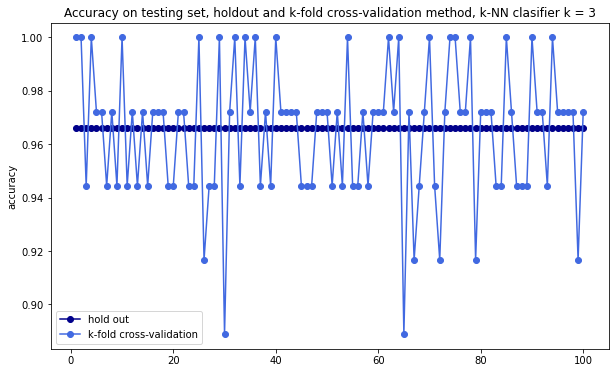

In [142]:
hold_out_and_cross_val(k=3)
# the point: k-fold cross-validation gives stable estimation of accuracy

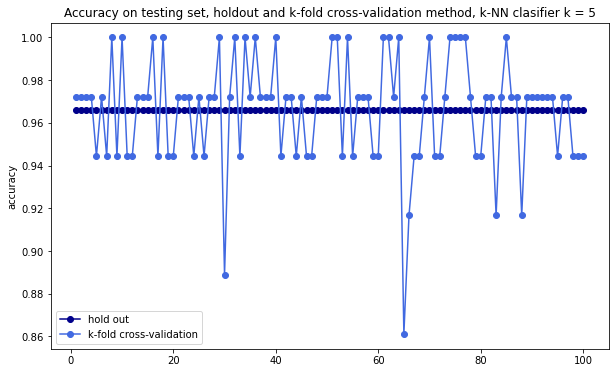

In [143]:
hold_out_and_cross_val(k=5)


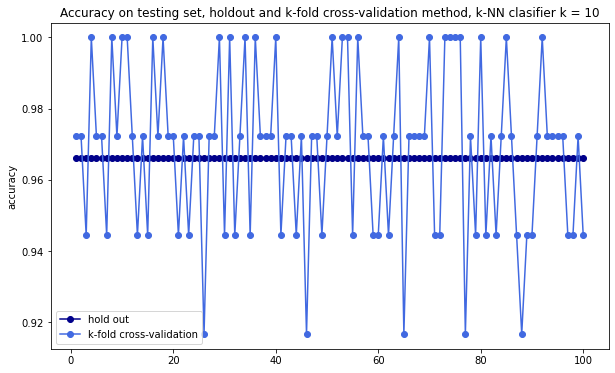

In [144]:
hold_out_and_cross_val(k=10)


### Trade-off: complexity vs. generalization
Plotting the (validation) testing curve in order to find optimal k

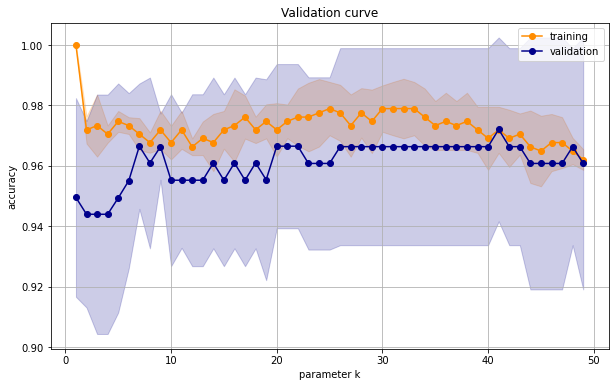

In [146]:
from sklearn.model_selection import validation_curve
# evaluate model performance using validation_curve
param_range = np.arange(1, 50)
estimators = [('standardize', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(estimators)
train_scores, test_scores = validation_curve(
    pipeline,
    X, Y,
    param_name='knn__n_neighbors',
    param_range=param_range,
    cv=5,
    scoring='accuracy'
)

# column: score for specific fold for different k
# row: results for specific k for different folds

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, 'o-', label='training', color='darkorange')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='darkorange')
plt.plot(param_range, test_mean, 'o-', label='validation', color='darkblue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='darkblue')

plt.title('Validation curve')
plt.xlabel('parameter k')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

########################################
Accuracy on train:  0.971830985915493
Accuracy on test:  0.9444444444444444
########################################
Recall on train:  0.9766081871345028
Recall on test:  0.9523809523809524
########################################
Precision on train:  0.9697278911564625
Precision on test:  0.9440559440559441
########################################


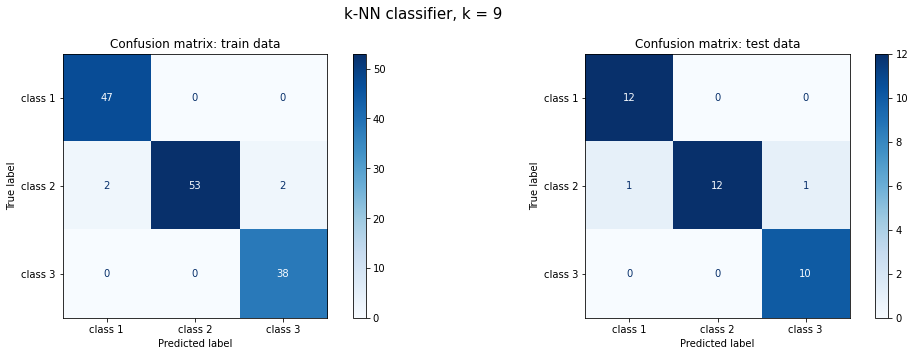

In [147]:
# Let's choose k=9 as optimal
# Training such classifier and evaluating 
k = 9
knn_optimal = KNeighborsClassifier(n_neighbors=k)
knn_optimal.fit(X_train, y_train)

knn_evaluate(knn_optimal)

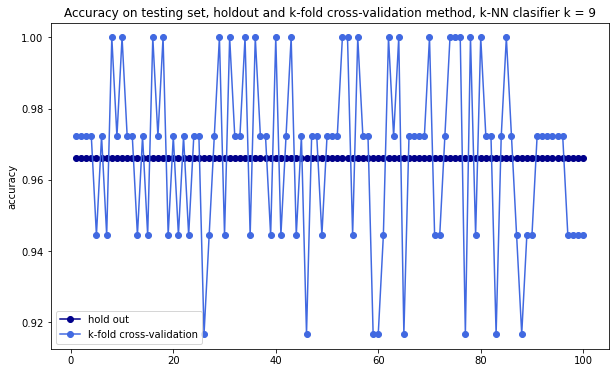

In [149]:
hold_out_and_cross_val(k=9)  # number of folds: 10

### Efficiency: Runtime
Total runtime for training & testing k-NN classifier (k-fold cross validation), 
- k  : 9
- cv : 10

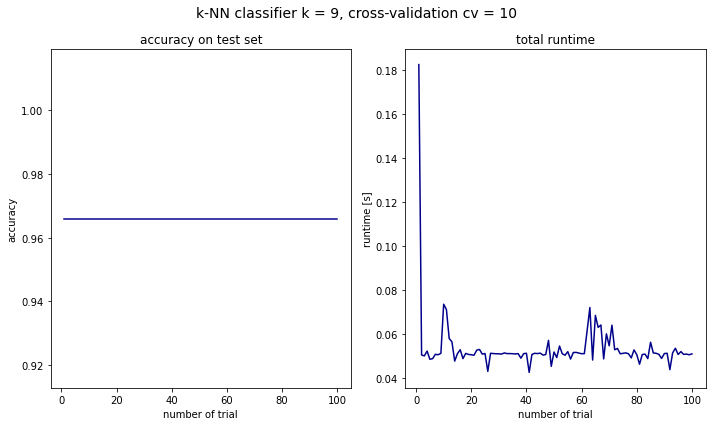

In [166]:
import time

runtime = np.zeros(100)
acc_test = np.zeros(100)

for i in range(0, 100):
    start_time = time.time()
    
    estimators = [('standardize', StandardScaler()), ('knn', KNeighborsClassifier())]
    pipeline = Pipeline(estimators)
    scores = cross_val_score(pipeline, X, Y, cv=10)
    acc_test[i] = np.mean(scores)

    end_time = time.time()

    runtime[i] = end_time - start_time
    
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, 101), acc_test, '-', color='darkblue')
plt.ylabel('accuracy')
plt.xlabel('number of trial')
plt.title('accuracy on test set')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 101), runtime, '-', color='darkblue')
plt.ylabel('runtime [s]')
plt.xlabel('number of trial')
plt.title('total runtime')

plt.suptitle('k-NN classifier k = 9, cross-validation cv = 10', fontsize=14)
plt.tight_layout()

plt.show()

In [170]:
print('Mean accuracy : ', str(np.mean(acc_test)))
print('Mean runtime  : ', str(np.mean(runtime)), ' s')

Mean accuracy :  0.9660130718954245
Mean runtime  :  0.05371602773666382  s
